In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

pair1 = ["What you do defines you", "Your deeds define you"]
pair2 = ["Once upon a time there lived a king.", "Who is your queen?"]
pair3 = ["He is desperate", "Is he not desperate?"]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
def jaccard_similarity(str1, str2):
    tokens1 = set(word_tokenize(str1.lower()))
    tokens2 = set(word_tokenize(str2.lower()))
    intersection = tokens1.intersection(tokens2)
    union = tokens1.union(tokens2)
    return len(intersection) / len(union)

jaccard_index_pair1 = jaccard_similarity(pair1[0], pair1[1])
print(f"Jaccard Similarity Index for pair1: {jaccard_index_pair1}")

Jaccard Similarity Index for pair1: 0.14285714285714285


###Exercise 2

In [3]:
pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.2 MB/s eta 0:00:00


In [4]:
import Levenshtein

str1 = "I cannot believe what he said"
str2 = "I believe it is not what he said"
levenshtein_distance = Levenshtein.distance(str1, str2)
print(f"Levenshtein Distance: {levenshtein_distance}")

Levenshtein Distance: 15


###Exercise 3

In [17]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

with open("Europe_Covid.txt", "r") as file:
    europe_covid_text = file.read()

# Tokenize the text
tokenized_text = [word_tokenize(sentence.lower()) for sentence in nltk.sent_tokenize(europe_covid_text)]

# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Find the most similar words
similar_to_government = model.wv.most_similar('government')
similar_to_curfew = model.wv.most_similar('curfew')

print("Most similar words to 'government':", similar_to_government)
print("Most similar words to 'curfew':", similar_to_curfew)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most similar words to 'government': [('next', 0.3014416992664337), ('class', 0.26634857058525085), ('also', 0.25059938430786133), ('well', 0.23926809430122375), ('estimates', 0.2361537665128708), ('none', 0.2288815826177597), ('worst-hit', 0.22431285679340363), ('stay', 0.2115347534418106), ('czech', 0.20615756511688232), ('france.in', 0.20031486451625824)]
Most similar words to 'curfew': [('but', 0.2296932488679886), ('beginning', 0.2276214212179184), ('nations', 0.22718878090381622), ('officially', 0.20626649260520935), ('infections', 0.205727681517601), ('recorded', 0.19193533062934875), ('limit', 0.18912699818611145), ('worst-hit', 0.18454666435718536), ('appeal', 0.174602672457695), ('dramatic', 0.167167067527771)]


###Exercise 4


In [10]:
from textblob import TextBlob

with open("Europe_Covid.txt", "r") as file:
    europe_covid_text = file.read()

blob = TextBlob(europe_covid_text)
sentiment = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity
print(f"Sentiment: {sentiment}, Subjectivity: {subjectivity}")

Sentiment: 0.04992382294707877, Subjectivity: 0.3476432095036746


### Exercise 5


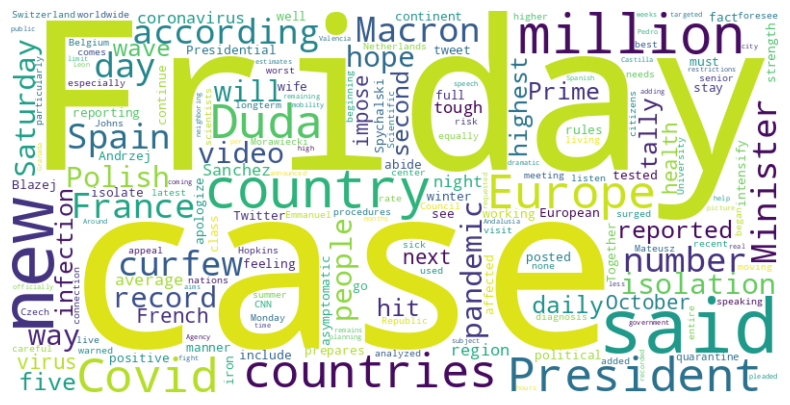

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(europe_covid_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###Exercise 6


In [13]:
pip install sumy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.4 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21692 sha256=3e1b29361fb794161f83842fe4ad185979f1fba6b27f9cb85d66df9d0bab9521
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=21ebf3e9e4c315965a36bd7da14168b8290f6d222b208129b2353ec491d0318a
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built breadability docopt


In [14]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

parser = PlaintextParser.from_string(europe_covid_text, Tokenizer("english"))
summarizer = LsaSummarizer()
summary = summarizer(parser.document, 5)  # 5 sentences

for sentence in summary:
    print(sentence)

Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday.
Together with my wife, we abide by the rules of isolation in an iron manner," he said in a video posted on Twitter on Saturday.
Macron added that his government aims to impose new coronavirus restrictions in a targeted way.
Spain's Prime Minister Pedro Sanchez pleaded with the public to limit their mobility and help fight a second wave, during a speech on Friday.
"The next few weeks, months will be tough, very tough," Sanchez said, adding that while Spain has officially recorded more than 1 million cases, he estimates the real number is more than 3 million.


### Exercise 7

In [15]:
pip install transformers

In [16]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")

text = "Your text here"
labels = ["informational", "query", "advocacy", "not informational"]

result = classifier(text, candidate_labels=labels)
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


{'sequence': 'Your text here', 'labels': ['informational', 'query', 'advocacy', 'not informational'], 'scores': [0.41816601157188416, 0.3013753592967987, 0.18112713098526, 0.09933142364025116]}
